In [1]:
!pip install -q datasets[audio]
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 42.1 MB/s eta 0:00:00


## load data

In [2]:
num_classes = 10
class_names = ['Tylenol', 'Advil', 'Bayer', 'Aleve', 'Panadol', 'Voltaren', 'Ponstel', 'Dolo', 'Indocin', 'Pyridium']

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("audiofolder", data_dir="/content/drive/MyDrive/Dataset/fyp_dataset_final", split="train")

Resolving data files:   0%|          | 0/901 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset audiofolder downloaded and prepared to /root/.cache/huggingface/datasets/audiofolder/default-78190304c9a00598/0.0.0/6cbdd16f8688354c63b4e2a36e1585d05de285023ee6443ffd71c4182055c0fc. Subsequent calls will reuse this data.


In [5]:
from datasets import ClassLabel
medicine_classlabel = ClassLabel(num_classes = num_classes,names = class_names)
dataset = dataset.cast_column("label", medicine_classlabel)

Casting the dataset:   0%|          | 0/900 [00:00<?, ? examples/s]

In [6]:
dataset = dataset.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)

In [7]:
dataset['test'][0]["audio"]

{'path': '/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Bayer_83.wav',
 'array': array([-6.10351562e-05, -3.05175781e-05,  0.00000000e+00, ...,
        -1.31530762e-02, -1.24511719e-02, -1.21154785e-02]),
 'sampling_rate': 22050}

## get predictions

In [8]:
import speech_recognition as sr

In [9]:
import time

In [10]:
# initialize the recognizer
r = sr.Recognizer()

In [11]:
import IPython.display as display
display.Audio(dataset['test'][3]["audio"]['path'], autoplay=True)

In [12]:
transcriptions = []
for input_values in dataset['test']['audio']:
  file_path = input_values['path']
  print(file_path)
  try:
    with sr.AudioFile(file_path) as source:
      # listen for the data (load audio to memory)
      audio_data = r.record(source)
      # recognize (convert from speech to text)
      try:
        text = r.recognize_google(audio_data)
      except:
        print('unknown value error')
        text = ''
      transcriptions.append(text)
      time.sleep(2) #delay for 2 seconds for next request
  except:
    print('format not supported')
    text = ''
    transcriptions.append(text)

/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Bayer_83.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Dolo_70.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Tylenol_2.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Indocin_39.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Tylenol_69.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Pyridium_2.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Dolo_7.wav
format not supported
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Bayer_16.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Bayer_21.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Ponstel_77.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Pyridium_20.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Aleve_70.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Indocin_62.wav
/content/drive/MyDrive/Dataset/fyp_dataset_final/train/Tylenol_7.wav
format not supp

In [13]:
label2id, id2label = dict(), dict()
for i, label in enumerate(class_names):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [14]:
print(transcriptions)
actual = [id2label[str(x)] for x in dataset['test']['label']]
print(actual)

['bear', 'dolo', 'Tylenol', 'indocin', 'Tylenol', 'Pyridium', '', 'bear', 'bear', 'cancel', 'Stadium', 'any', 'indocin', '', 'Tylenol', 'Voltaren', 'Tylenol', 'ponstel', 'ponstel', 'bear', 'all terrain', 'spider', 'Palladium', '', 'Al-Anon', 'windows', '', 'Voltaren', '', 'Voltaren', 'Bernardo', 'Ellie', '', 'Tylenol', 'farmstead', '', 'Panadol', '', 'pddm', 'golo', 'dollar', '', 'alev', '', 'Lolo', 'iridium', '', 'Advil', 'Barnstable', 'adverb', 'bear', 'Adele', 'Barnstable', 'buy radium', '', 'indocin', 'Panadol', 'Banette', '', '', '', 'Bonsall', '', 'Ellie', '', 'Panadol', 'Finding Dory', 'Aleve', 'Thailand', 'praedium', 'Thailand', '', 'Tylenol', 'download', '', '', 'Panadol', '', 'indocin', 'hoarder', 'Acme', '', 'Elam', '', 'dolo', '', 'bear', 'hoarder', 'praedium', '', 'Al-Anon', 'indocin', 'Tylenol', '', '', 'Tylenol', 'orgeron', 'monster', 'bonstell', '', 'dodo', 'Johnston', 'Bale', 'indocin', 'spider diem', 'bonstelle', '', 'Tylenol', '', 'Funston', 'dolo', 'dollar', '', 'Ad

## evaluation

In [15]:
!pip install -q evaluate
!pip install -q jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s eta 0:00:00


In [16]:
from evaluate import load
cer = load("cer")
cer_score = cer.compute(predictions=transcriptions, references=actual)

In [17]:
print(cer_score)

0.5458553791887125


In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
stopwords = set(STOPWORDS)
prediction_str = ''

for i in range(len(transcriptions)):
  transcriptions[i] = transcriptions[i].lower()

prediction_str += " ".join(transcriptions)+" "
prediction_str

'bear dolo tylenol indocin tylenol pyridium  bear bear cancel stadium any indocin  tylenol voltaren tylenol ponstel ponstel bear all terrain spider palladium  al-anon windows  voltaren  voltaren bernardo ellie  tylenol farmstead  panadol  pddm golo dollar  alev  lolo iridium  advil barnstable adverb bear adele barnstable buy radium  indocin panadol banette    bonsall  ellie  panadol finding dory aleve thailand praedium thailand  tylenol download   panadol  indocin hoarder acme  elam  dolo  bear hoarder praedium  al-anon indocin tylenol   tylenol orgeron monster bonstell  dodo johnston bale indocin spider diem bonstelle  tylenol  funston dolo dollar  advil  dodo  voltaren indocin tylenol onsted panadol voltaren  bear  pddm  advil indocin indocin la  voltaren panadol idiom stadium bonstelle  hardwell panadol indocin  download anna. advil aleve barnstable  panadol lawson bonstell advil order in radio indocin  dollar tylenol  terraria advil man panadol  advil  bear aleve adriel praedium al

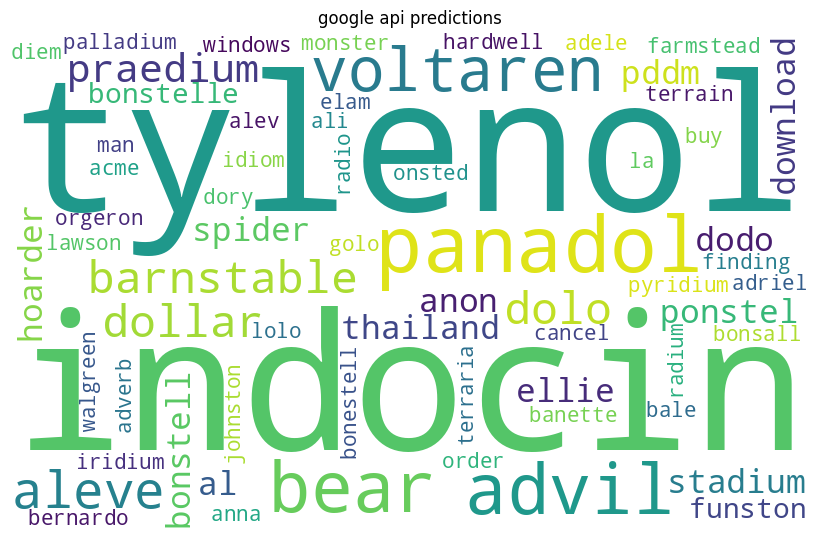

In [20]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(prediction_str)

plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('google api predictions')
plt.show()